# KNN - Predict whether a person will have diabetes or not

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
dataset = pd.read_csv("diabetes.csv")

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# count the number of zeros in all columns

for column_name in dataset.columns:
    column = dataset[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Pregnancies  is :  111
Count of zeros in column  Glucose  is :  0
Count of zeros in column  BloodPressure  is :  0
Count of zeros in column  SkinThickness  is :  0
Count of zeros in column  Insulin  is :  374
Count of zeros in column  BMI  is :  0
Count of zeros in column  DiabetesPedigreeFunction  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  Outcome  is :  500


In [22]:
# Replace zeros with NaN and then Replace NaN with Mean value

zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Age']

for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0,np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)


# check the number of zeros in each column (not accepted zero columns) again:

for column_name in zero_not_accepted:
    column = dataset[column_name]
    count = (column == 0).sum()
    print("Count of zeros in column",column_name,"is: ", count)

In [19]:
X = dataset.iloc[:,0:8]
y = dataset.iloc[:,-1]

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size = 0.2)

KNN is sensitive to the scale of features

In [21]:
# Feature scaling 

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

Now we would like to select the number of initial neighbors

Rule of thumb:
    a. sqrt(n), n is the number of sampels
    b. avoid even number of neighbors, prefer odd numbers

In [28]:
import math

math.sqrt(len(y_test))

12.409673645990857

In [31]:
classifier = KNeighborsClassifier(n_neighbors = 11, p =2)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

Evaluate the model

In [33]:
# 1. confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[84 17]
 [26 27]]


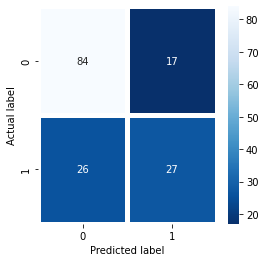

In [40]:
import seaborn as sns
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True,fmt=".0f",linewidth=5,cmap='Blues_r')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

# annot: bool or rectangular dataset, optional
# If True, write the data value in each cell

In [35]:
# 2. f1-score
print(f1_score(y_test,y_pred))

0.556701030927835


In [41]:
# 3. accuracy score
print(accuracy_score(y_test,y_pred))

0.7207792207792207
